In [1]:
from test import TreeTester
from trees import BinarySearchTree
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('fivethirtyeight')
%matplotlib inline

In [10]:
bst = BinarySearchTree()
tester = TreeTester({"BST": bst})
seq = tester.insertRandomElements(10000)

inerting 10000 shuffled values into BST


In [11]:
tester.compareDepthAccessTimes()

computing height
BST: timing access from depth 0 to depth 28


,BST_mean
0,0.000005
1,0.000003
2,0.000003
3,0.000003
4,0.000003
5,0.000004
6,0.000003
7,0.000004
8,0.000005
9,0.000008


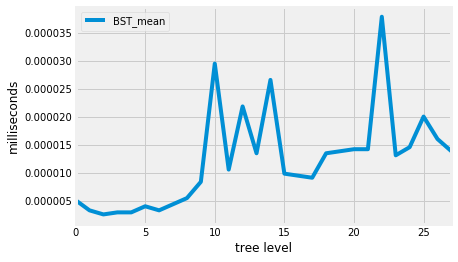

In [12]:
_.plot()
plt.xlabel('tree level')
plt.ylabel('milliseconds')
plt.show()